In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython
from findpeaks import findpeaks
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk, find_peaks
from scipy.io import wavfile

In [3]:
s, fs = sf.read('xsuvor00.wav')
s = s[:250000]
t = np.arange(s.size) / fs

<IPython.core.display.Javascript object>


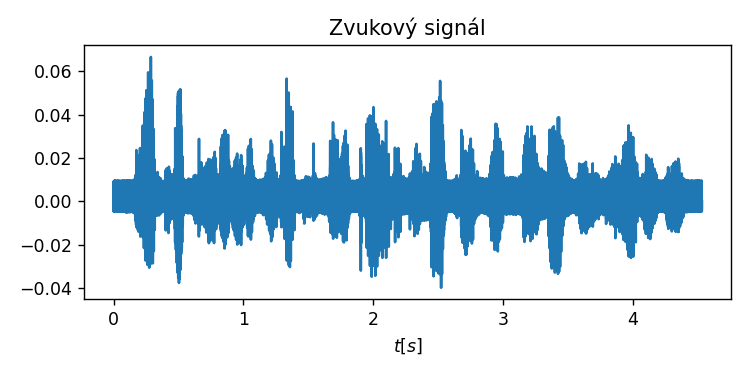

In [4]:
plt.figure(figsize=(6,3))
plt.plot(t, s)

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál')

plt.tight_layout()

In [5]:
print('minimalni hodnota:',min(s))
print('maximalni hodnota:',max(s))
print('Delka signalu ve sekundach:',s.size/fs)
print('Delka signalu ve vzorcichch:',s.size)

minimalni hodnota: -0.0399169921875
maximalni hodnota: 0.066558837890625
Delka signalu ve sekundach: 4.53125
Delka signalu ve vzorcichch: 72500


<IPython.core.display.Javascript object>


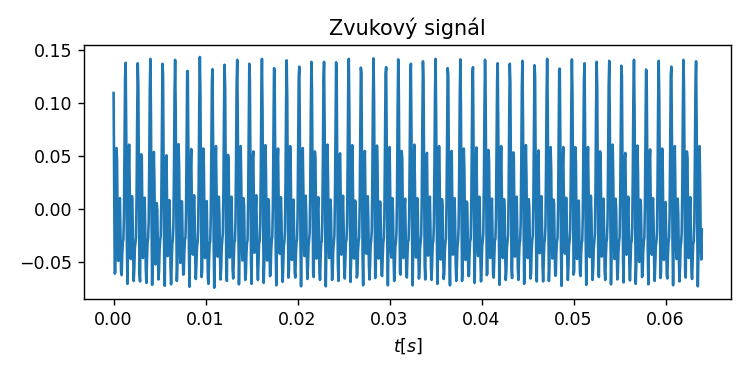

In [6]:
si, freq = sf.read('xsuvor00.wav')
si = si - np.mean(si);
si = si/max(abs(si));

samples_sec = si.size/4531.250; # kolik vzorku v 1 ms (16)
frame_length = samples_sec*64; # hodnota vzorku v 64 ms 
overlap = samples_sec*32; # hodnota vzorku v for 32 ms

si = si[:1024]
ti = np.arange(si.size) / freq

plt.figure(figsize=(6,3))
plt.plot(ti, si)

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál')

plt.tight_layout()

<IPython.core.display.Javascript object>


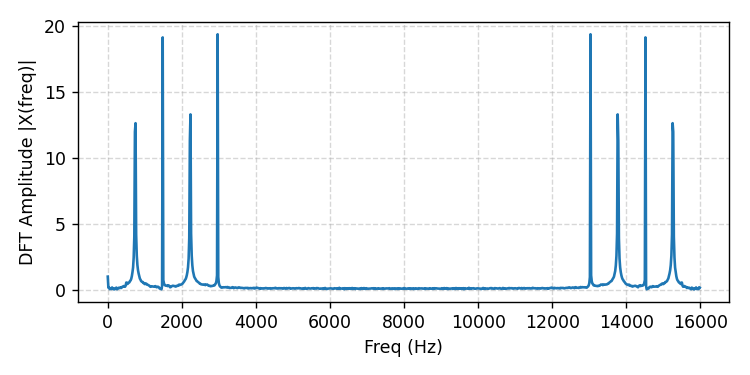

In [7]:
odkud = 0     # začátek segmentu v sekundách
kolik = 0.06  # délka segmentu v sekundách
odkud_vzorky = int(odkud * fs)         # začátek segmentu ve vzorcích
pokud_vzorky = int((odkud+kolik) * fs) # konec segmentu ve vzorcích
s_seg = si[odkud_vzorky:pokud_vzorky]

def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X
X = DFT(s_seg)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/pokud_vzorky
frq = n/T

Nu = s_seg.size
s_seg_spec = np.fft.fft(s_seg)
G = 10 * np.log10(1/Nu * np.abs(s_seg_spec)**2)
f = np.arange(G.size) / Nu * fs

plt.figure(figsize = (6, 3))
plt.plot(f, abs(X))
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

plt.tight_layout()

<IPython.core.display.Javascript object>


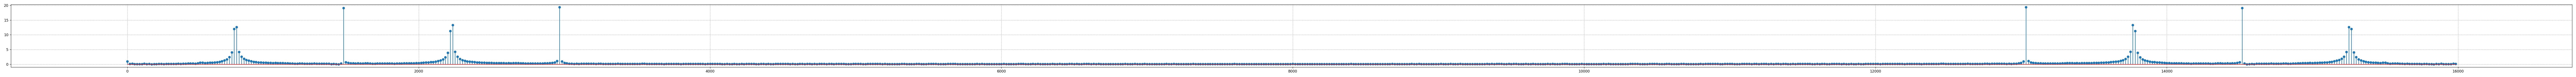

In [8]:
plt.figure(figsize = (100, 3))
plt.stem(f, abs(X))
plt.grid(linestyle='--')
plt.show()

plt.tight_layout()

<IPython.core.display.Javascript object>


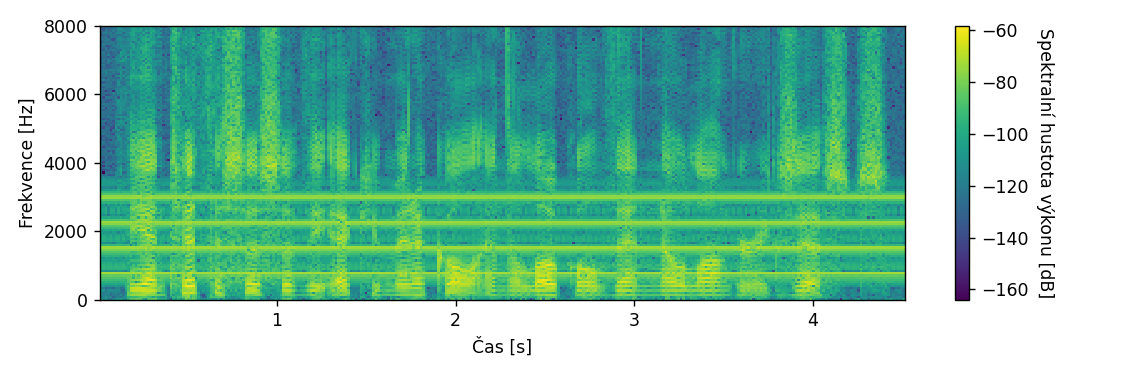

C:\Users\artur\AppData\Local\Temp/ipykernel_3300/3571099161.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f,sgr_log)


In [9]:
f, t, sgr = spectrogram(s, fs)
sgr_log = 10 * np.log10(sgr+1e-20) 
plt.figure(figsize=(9,3))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()

In [18]:
f1 = 781.26
f2 = 1483.33334
f3 = 2235.33334
f4 = 2972
print('f2/f1 = ',f2/f1)
print('f3/f1 = ',f3/f1)
print('f4/f1 = ',f4/f1)

f2/f1 =  1.898642372577631
f3/f1 =  2.861190051967335
f4/f1 =  3.8041113073752655


In [19]:
n1 = np.linspace(0, 4.53125, 72500)
n2 = np.linspace(0, 4.53125, 72500)
n3 = np.linspace(0, 4.53125, 72500)
n4 = np.linspace(0, 4.53125, 72500)
s1 = np.cos(2*np.pi*f1*n1) 
s2 = np.cos(2*np.pi*f2*n2) 
s3 = np.cos(2*np.pi*f3*n3)
s4 = np.cos(2*np.pi*f4*n4)
signal_out = s1+s2+s3+s4
wavfile.write('4cos.wav', fs, signal_out.astype(np.float32))

<IPython.core.display.Javascript object>


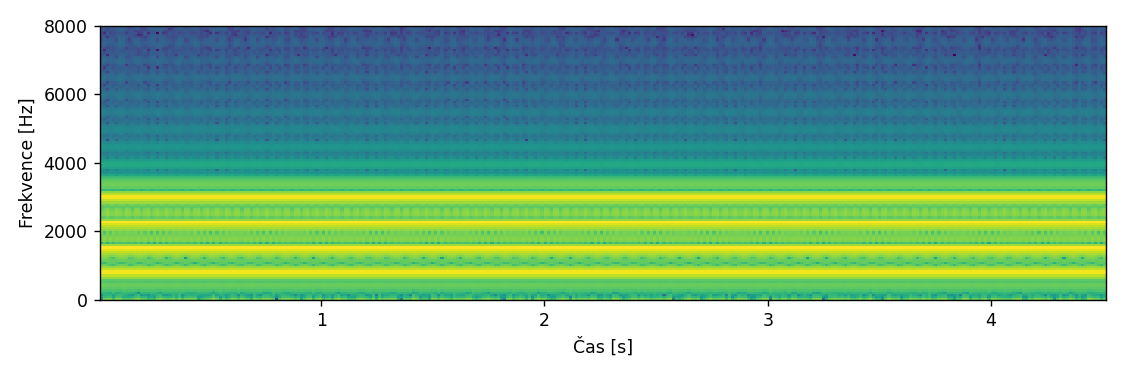

C:\Users\artur\AppData\Local\Temp/ipykernel_3300/1014518434.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f,sgr_log)


In [20]:
sign, frqs = sf.read('4cos.wav')
sign = sign[:250000]
t = np.arange(sign.size) / frqs
f, t, sgr = spectrogram(sign, frqs)
sgr_log = 10 * np.log10(sgr+1e-20) 
plt.figure(figsize=(9,3))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')

plt.tight_layout()

<IPython.core.display.Javascript object>


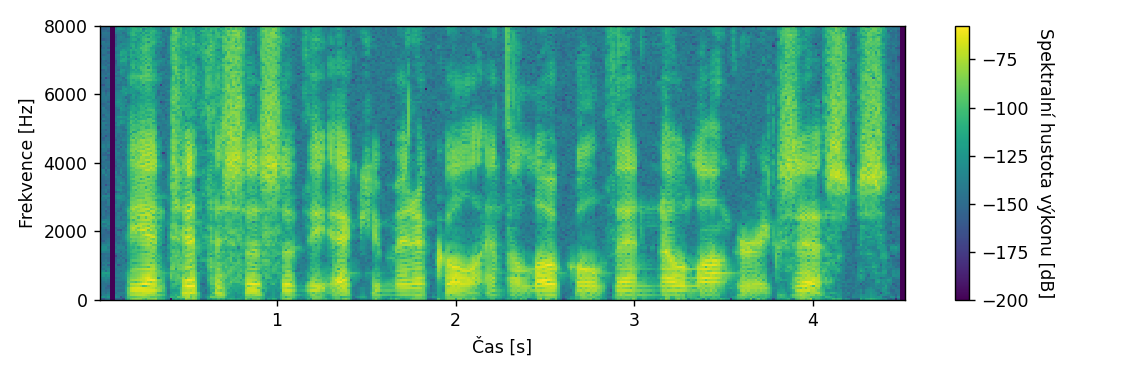

C:\Users\artur\AppData\Local\Temp/ipykernel_3300/1303768109.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f,sgr_log)


In [17]:
s, fs = sf.read('clean_aaa.wav')
s = s[:250000]
t = np.arange(s.size) / fs
f, t, sgr = spectrogram(s, fs)
sgr_log = 10 * np.log10(sgr+1e-20) 
plt.figure(figsize=(9,3))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()